In [25]:
pip install pandas


In [3]:
import re
import pandas as pd


f = open('WhatsApp Chat with Sreekar Sits.txt','r', encoding='utf-8')

In [4]:
data = f.read()

In [5]:
print(data)

12/02/2023, 17:48 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
12/02/2023, 20:51 - Sreekar Sits: 😂😂
12/02/2023, 20:51 - Sreekar Sits: Ufffff
12/02/2023, 20:51 - Sreekar Sits: It's been busy time since afternoon
12/02/2023, 21:04 - Ramya: Achaaa
12/02/2023, 21:04 - Ramya: Did you heard about attendence biometric
12/02/2023, 21:05 - Ramya: Atleast we need to have 65% right 😭
12/02/2023, 21:36 - Sreekar Sits: 🥲🥲
12/02/2023, 21:36 - Sreekar Sits: Yes
12/02/2023, 21:36 - Sreekar Sits: I'm not sure what to do
12/02/2023, 21:36 - Sreekar Sits: If there is no detention then I won't come
12/02/2023, 21:37 - Ramya: Ofc there is detention that's what if not no one would come 🥲
12/02/2023, 21:38 - Sreekar Sits: Actually they told the same in 4-1
12/02/2023, 21:38 - Sreekar Sits: That's why I came around 1montj
12/02/2023, 21:38 - Ramya: Offooo
12/02/2023, 21:39 - Ramya: But thing is for this sem also a

In [6]:
print(type(data))

<class 'str'>


In [7]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [8]:
messages = re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Sreekar Sits: 😂😂\n',
 'Sreekar Sits: Ufffff\n',
 "Sreekar Sits: It's been busy time since afternoon\n",
 'Ramya: Achaaa\n',
 'Ramya: Did you heard about attendence biometric\n',
 'Ramya: Atleast we need to have 65% right 😭\n',
 'Sreekar Sits: 🥲🥲\n',
 'Sreekar Sits: Yes\n',
 "Sreekar Sits: I'm not sure what to do\n",
 "Sreekar Sits: If there is no detention then I won't come\n",
 "Ramya: Ofc there is detention that's what if not no one would come 🥲\n",
 'Sreekar Sits: Actually they told the same in 4-1\n',
 "Sreekar Sits: That's why I came around 1montj\n",
 'Ramya: Offooo\n',
 'Ramya: But thing is for this sem also attend one month last days of clg 😭\nJealous of you guys 😭😭\n',
 "Sreekar Sits: Idk exactly what I'll doing\n",
 'Sreekar Sits: If I get any internship then I can manage the attendance\n',
 "Sreekar Sits: If not, I'm not understa

In [9]:
len(messages)

24505

In [10]:
dates = re.findall(pattern, data)
dates

['12/02/2023, 17:48 - ',
 '12/02/2023, 20:51 - ',
 '12/02/2023, 20:51 - ',
 '12/02/2023, 20:51 - ',
 '12/02/2023, 21:04 - ',
 '12/02/2023, 21:04 - ',
 '12/02/2023, 21:05 - ',
 '12/02/2023, 21:36 - ',
 '12/02/2023, 21:36 - ',
 '12/02/2023, 21:36 - ',
 '12/02/2023, 21:36 - ',
 '12/02/2023, 21:37 - ',
 '12/02/2023, 21:38 - ',
 '12/02/2023, 21:38 - ',
 '12/02/2023, 21:38 - ',
 '12/02/2023, 21:39 - ',
 '12/02/2023, 21:41 - ',
 '12/02/2023, 21:41 - ',
 '12/02/2023, 21:42 - ',
 '12/02/2023, 21:42 - ',
 '12/02/2023, 21:43 - ',
 '12/02/2023, 21:44 - ',
 '12/02/2023, 21:44 - ',
 '12/02/2023, 21:44 - ',
 '12/02/2023, 21:45 - ',
 '12/02/2023, 21:45 - ',
 '12/02/2023, 21:45 - ',
 '12/02/2023, 21:46 - ',
 '12/02/2023, 21:46 - ',
 '12/02/2023, 21:46 - ',
 '12/02/2023, 21:46 - ',
 '12/02/2023, 21:46 - ',
 '12/02/2023, 21:47 - ',
 '12/02/2023, 21:47 - ',
 '12/02/2023, 21:47 - ',
 '12/02/2023, 21:47 - ',
 '12/02/2023, 21:47 - ',
 '12/02/2023, 21:47 - ',
 '12/02/2023, 21:47 - ',
 '12/02/2023, 21:47 - ',


In [11]:
len(dates)

24505

In [12]:
df = pd.DataFrame({'user_message': messages, 'message_date':dates})
#convert message_date type

df['message_date']= pd.to_datetime(df['message_date'], format ='%d/%m/%Y, %H:%M - ')
df.rename(columns= {'message_date' : 'date'}, inplace = True)
df.head()

user_message                date
0  Messages and calls are end-to-end encrypted. N... 2023-02-12 17:48:00
1                                 Sreekar Sits: 😂😂\n 2023-02-12 20:51:00
2                             Sreekar Sits: Ufffff\n 2023-02-12 20:51:00
3  Sreekar Sits: It's been busy time since aftern... 2023-02-12 20:51:00
4                                    Ramya: Achaaa\n 2023-02-12 21:04:00

In [13]:
#separate users and messages 
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user']= users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

date                user  \
0 2023-02-12 17:48:00  group_notification   
1 2023-02-12 20:51:00        Sreekar Sits   
2 2023-02-12 20:51:00        Sreekar Sits   
3 2023-02-12 20:51:00        Sreekar Sits   
4 2023-02-12 21:04:00               Ramya   

                                             message  
0  Messages and calls are end-to-end encrypted. N...  
1                                               😂😂\n  
2                                           Ufffff\n  
3              It's been busy time since afternoon\n  
4                                           Achaaa\n

In [14]:
df['year']= df['date'].dt.year

In [15]:
df.head()

date                user  \
0 2023-02-12 17:48:00  group_notification   
1 2023-02-12 20:51:00        Sreekar Sits   
2 2023-02-12 20:51:00        Sreekar Sits   
3 2023-02-12 20:51:00        Sreekar Sits   
4 2023-02-12 21:04:00               Ramya   

                                             message  year  
0  Messages and calls are end-to-end encrypted. N...  2023  
1                                               😂😂\n  2023  
2                                           Ufffff\n  2023  
3              It's been busy time since afternoon\n  2023  
4                                           Achaaa\n  2023

In [16]:
df['month']= df['date'].dt.month_name()

In [17]:
df['day'] = df['date'].dt.day

In [18]:
df['hour'] = df['date'].dt.hour

In [19]:
df['minute']= df['date'].dt.minute

In [20]:
df.head()

date                user  \
0 2023-02-12 17:48:00  group_notification   
1 2023-02-12 20:51:00        Sreekar Sits   
2 2023-02-12 20:51:00        Sreekar Sits   
3 2023-02-12 20:51:00        Sreekar Sits   
4 2023-02-12 21:04:00               Ramya   

                                             message  year     month  day  \
0  Messages and calls are end-to-end encrypted. N...  2023  February   12   
1                                               😂😂\n  2023  February   12   
2                                           Ufffff\n  2023  February   12   
3              It's been busy time since afternoon\n  2023  February   12   
4                                           Achaaa\n  2023  February   12   

   hour  minute  
0    17      48  
1    20      51  
2    20      51  
3    20      51  
4    21       4

In [21]:
df[df['user']== 'Ramya'].shape[0]

12496

In [22]:
df[df['user']== 'Sreekar Sits'].shape[0]

12007

In [23]:
for message in df['message']:
    print(message)

Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.

😂😂

Ufffff

It's been busy time since afternoon

Achaaa

Did you heard about attendence biometric

Atleast we need to have 65% right 😭

🥲🥲

Yes

I'm not sure what to do

If there is no detention then I won't come

Ofc there is detention that's what if not no one would come 🥲

Actually they told the same in 4-1

That's why I came around 1montj

Offooo

But thing is for this sem also attend one month last days of clg 😭
Jealous of you guys 😭😭

Idk exactly what I'll doing

If I get any internship then I can manage the attendance

If not, I'm not understanding what to do

Just attend weekly twice and say I'm attending interviews simple take a permission

They'll ask to show some proof🥴

Leave abt me, what you guys will do?

I'll try to maintain 65

Just I'll go to clg taking my laptop over there I'll just my work instead listening to those fuck' classe

In [24]:
for message in df['message']:
    print(message.split())

['Messages', 'and', 'calls', 'are', 'end-to-end', 'encrypted.', 'No', 'one', 'outside', 'of', 'this', 'chat,', 'not', 'even', 'WhatsApp,', 'can', 'read', 'or', 'listen', 'to', 'them.', 'Tap', 'to', 'learn', 'more.']
['😂😂']
['Ufffff']
["It's", 'been', 'busy', 'time', 'since', 'afternoon']
['Achaaa']
['Did', 'you', 'heard', 'about', 'attendence', 'biometric']
['Atleast', 'we', 'need', 'to', 'have', '65%', 'right', '😭']
['🥲🥲']
['Yes']
["I'm", 'not', 'sure', 'what', 'to', 'do']
['If', 'there', 'is', 'no', 'detention', 'then', 'I', "won't", 'come']
['Ofc', 'there', 'is', 'detention', "that's", 'what', 'if', 'not', 'no', 'one', 'would', 'come', '🥲']
['Actually', 'they', 'told', 'the', 'same', 'in', '4-1']
["That's", 'why', 'I', 'came', 'around', '1montj']
['Offooo']
['But', 'thing', 'is', 'for', 'this', 'sem', 'also', 'attend', 'one', 'month', 'last', 'days', 'of', 'clg', '😭', 'Jealous', 'of', 'you', 'guys', '😭😭']
['Idk', 'exactly', 'what', "I'll", 'doing']
['If', 'I', 'get', 'any', 'interns

In [25]:
words= []
for message in df['message']:
    words.extend(message.split())

In [26]:
len(words)

112304

In [27]:
num_media_messages = df[df['message'] == '<Media omitted>\n'].shape[0]
num_media_messages

309

In [28]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [29]:
from urlextract import URLExtract

extractor = URLExtract()

In [32]:
links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))
    

In [33]:
links


['https://link.medium.com/lQDiBtTInxb',
 'https://www.javatpoint.com/aptitude/quantitative',
 'voice.ai',
 'https://www.canva.com/design/DAFV0nu89vA/WqI09M5M3VnxTGXSJzP-Cg/view?utm_content=DAFV0nu89vA&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton',
 'https://spotify.link/LIaNoRi32xb',
 'https://spotify.link/XWTfEviL9xb',
 'https://images.app.goo.gl/TV225bnwXrihsoya8',
 'https://mega.nz/folder/2K5CCJbK#vwrkx_fPe9xy4pQyV9e5cg/folder/Saw0URzS',
 'https://meet.google.com/dgp-vqpy-erw',
 'https://cmake.org/download/',
 'https://forms.gle/Pciu6XQnjbENdn4s9',
 'https://chat.whatsapp.com/FPUv23OeQfs47oQjKgghbK',
 'https://forms.gle/Pciu6XQnjbENdn4s9',
 'https://chat.whatsapp.com/FPUv23OeQfs47oQjKgghbK',
 'https://bit.ly/techthrivers',
 'https://youtu.be/IUBN9yYDAlo',
 'https://www.udemy.com/course/numpy-for-data-science-and-machine-learning-in-python/?couponCode=055845099856',
 'https://youtu.be/Q0QwvZKG_6Q',
 'https://youtube.com/shorts/fW3zvvo36zw?feature=share',
 'Why.so'

In [34]:
len(links)

35

In [35]:
df

date                user  \
0     2023-02-12 17:48:00  group_notification   
1     2023-02-12 20:51:00        Sreekar Sits   
2     2023-02-12 20:51:00        Sreekar Sits   
3     2023-02-12 20:51:00        Sreekar Sits   
4     2023-02-12 21:04:00               Ramya   
...                   ...                 ...   
24500 2023-07-31 11:22:00        Sreekar Sits   
24501 2023-07-31 14:31:00               Ramya   
24502 2023-07-31 14:34:00               Ramya   
24503 2023-07-31 14:34:00               Ramya   
24504 2023-07-31 14:35:00               Ramya   

                                                 message  year     month  day  \
0      Messages and calls are end-to-end encrypted. N...  2023  February   12   
1                                                   😂😂\n  2023  February   12   
2                                               Ufffff\n  2023  February   12   
3                  It's been busy time since afternoon\n  2023  February   12   
4                                               Achaaa\n  2023  February   12   
...                                                  ...   ...       ...  ...   
24500                                    Very gud mrng\n  2023      July   31   
24501                                      lunch ?????\n  2023      July   31   
24502                         You deleted this message\n  2023      July   31   
24503                                  <Media omitted>\n  2023      July   31   
24504                                For my project 💀💀\n  2023      July   31   

       hour  minute  
0        17      48  
1        20      51  
2        20      51  
3        20      51  
4        21       4  
...     ...     ...  
24500    11      22  
24501    14      31  
24502    14      34  
24503    14      34  
24504    14      35  

[24505 rows x 8 columns]

In [36]:
df['user'].value_counts()


Ramya                 12496
Sreekar Sits          12007
group_notification        2
Name: user, dtype: int64

In [37]:
x = df['user'].value_counts().head()
x

Ramya                 12496
Sreekar Sits          12007
group_notification        2
Name: user, dtype: int64

In [38]:
import matplotlib.pyplot as plt

In [39]:
name = x.index
count = x.values

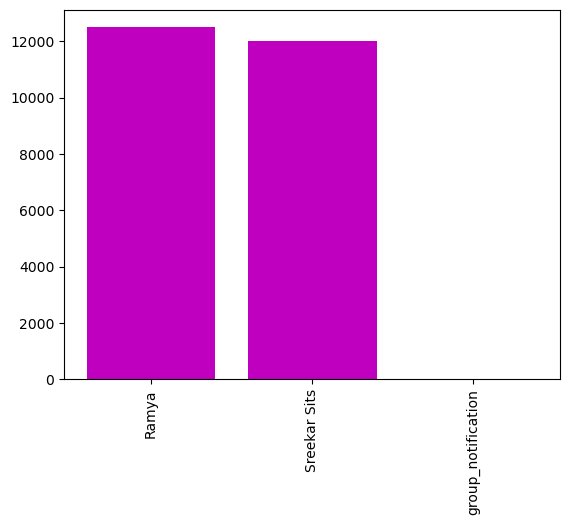

In [40]:
plt.bar(name, count, color='m',linewidth=5)
plt.xticks(rotation ='vertical')
plt.show()

In [52]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [53]:
f= open('stop_hinglish.txt', 'r')
stop_words= f.read()
print(stop_words)


.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achaa
achaaa
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
com

In [54]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [55]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

0     1
0       💀  3180
1      💀💀   802
2      😂😂   601
3       😂   402
4       🥲   289
5     clg   280
6    nice   269
7   movie   263
8     💀💀💀   240
9   sleep   238
10   home   171
11    gud   158
12   mrng   152
13   tmrw   151
14   null   149
15    day   147
16  gonna   143
17  today   139
18      😌   130
19  night   121

In [58]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [59]:
import emoji

In [62]:
pip install --upgrade emoji


Note: you may need to restart the kernel to use updated packages.


In [66]:
pip list emoji


Package                       VersionNote: you may need to restart the kernel to use updated packages.

----------------------------- ---------------
absl-py                       1.4.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs           

In [71]:
df['month_num'] = df['date'].dt.month

In [72]:
timeline= df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [73]:
timeline

year  month_num     month  message
0  2023          2  February     2665
1  2023          3     March     4246
2  2023          4     April     3417
3  2023          5       May     4443
4  2023          6      June     4187
5  2023          7      July     5547

In [74]:
for i in range(timeline.shape[0]):
    print(i)

0
1
2
3
4
5


In [77]:
for i in range(timeline.shape[0]):
    print(timeline['month'][i])

February
March
April
May
June
July


In [81]:
time =[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [82]:
timeline['time'] = time

In [83]:
timeline

year  month_num     month  message           time
0  2023          2  February     2665  February-2023
1  2023          3     March     4246     March-2023
2  2023          4     April     3417     April-2023
3  2023          5       May     4443       May-2023
4  2023          6      June     4187      June-2023
5  2023          7      July     5547      July-2023

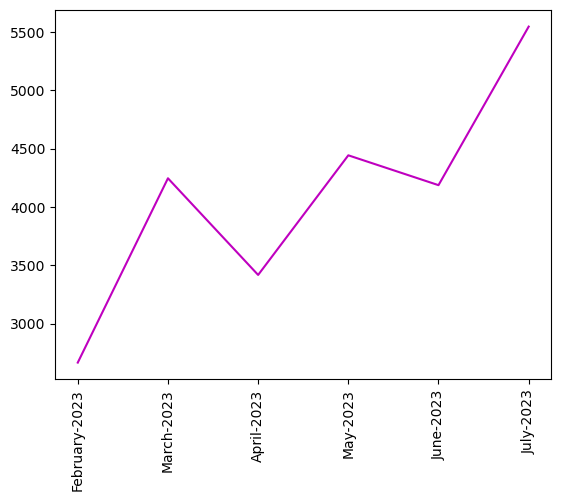

In [91]:
plt.plot(timeline['time'],timeline['message'],color='m')
plt.xticks(rotation ='vertical')
plt.show()

In [92]:
df['Date'] = df['date'].dt.date

In [100]:
daily_timeline = df.groupby('Date').count()['message'].reset_index()
daily_timeline

Date  message
0    2023-02-12      250
1    2023-02-13      449
2    2023-02-14      294
3    2023-02-15      222
4    2023-02-16       58
..          ...      ...
165  2023-07-27       55
166  2023-07-28      305
167  2023-07-29      100
168  2023-07-30       69
169  2023-07-31        8

[170 rows x 2 columns]

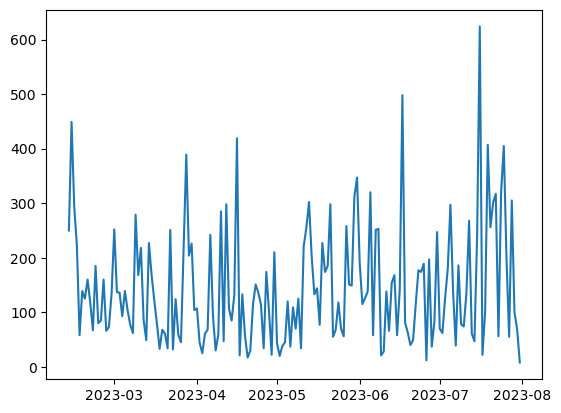

In [99]:

plt.plot(daily_timeline['Date'],daily_timeline['message'])


In [101]:
df.head()

date                user  \
0 2023-02-12 17:48:00  group_notification   
1 2023-02-12 20:51:00        Sreekar Sits   
2 2023-02-12 20:51:00        Sreekar Sits   
3 2023-02-12 20:51:00        Sreekar Sits   
4 2023-02-12 21:04:00               Ramya   

                                             message  year     month  day  \
0  Messages and calls are end-to-end encrypted. N...  2023  February   12   
1                                               😂😂\n  2023  February   12   
2                                           Ufffff\n  2023  February   12   
3              It's been busy time since afternoon\n  2023  February   12   
4                                           Achaaa\n  2023  February   12   

   hour  minute  month_num        Date  
0    17      48          2  2023-02-12  
1    20      51          2  2023-02-12  
2    20      51          2  2023-02-12  
3    20      51          2  2023-02-12  
4    21       4          2  2023-02-12

In [102]:
df['day_name'] = df['date'].dt.day_name()

In [103]:
df['day_name'].value_counts()

Wednesday    4092
Sunday       3892
Saturday     3613
Tuesday      3517
Thursday     3245
Friday       3143
Monday       3003
Name: day_name, dtype: int64

In [104]:
df['month'].value_counts()

July        5547
May         4443
March       4246
June        4187
April       3417
February    2665
Name: month, dtype: int64

In [105]:
period = []

for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" +str('00'))
    elif hour == 0:
        period.append(str('00')+ "-" + str(hour+1))
    else:
        period.append(str(hour)+ "-" + str(hour+1))

In [107]:
df['period'] = period

In [108]:
df.sample(5)

date          user  \
15089 2023-06-03 00:21:00  Sreekar Sits   
18979 2023-07-01 18:23:00         Ramya   
24093 2023-07-28 23:05:00         Ramya   
5996  2023-03-28 12:42:00  Sreekar Sits   
20589 2023-07-12 23:22:00         Ramya   

                                               message  year  month  day  \
15089  Making some house ceremony poster for mavayya\n  2023   June    3   
18979                                     Dont you ?\n  2023   July    1   
24093                                        Yes yes\n  2023   July   28   
5996       It's not good time to go and meeting sir😂\n  2023  March   28   
20589                   Ohhhh 💀💀 read tmrw it's okay\n  2023   July   12   

       hour  minute  month_num        Date   day_name period  
15089     0      21          6  2023-06-03   Saturday   00-1  
18979    18      23          7  2023-07-01   Saturday  18-19  
24093    23       5          7  2023-07-28     Friday  23-00  
5996     12      42          3  2023-03-28    Tuesday  12-13  
20589    23      22          7  2023-07-12  Wednesday  23-00

In [110]:
pip install seaborn

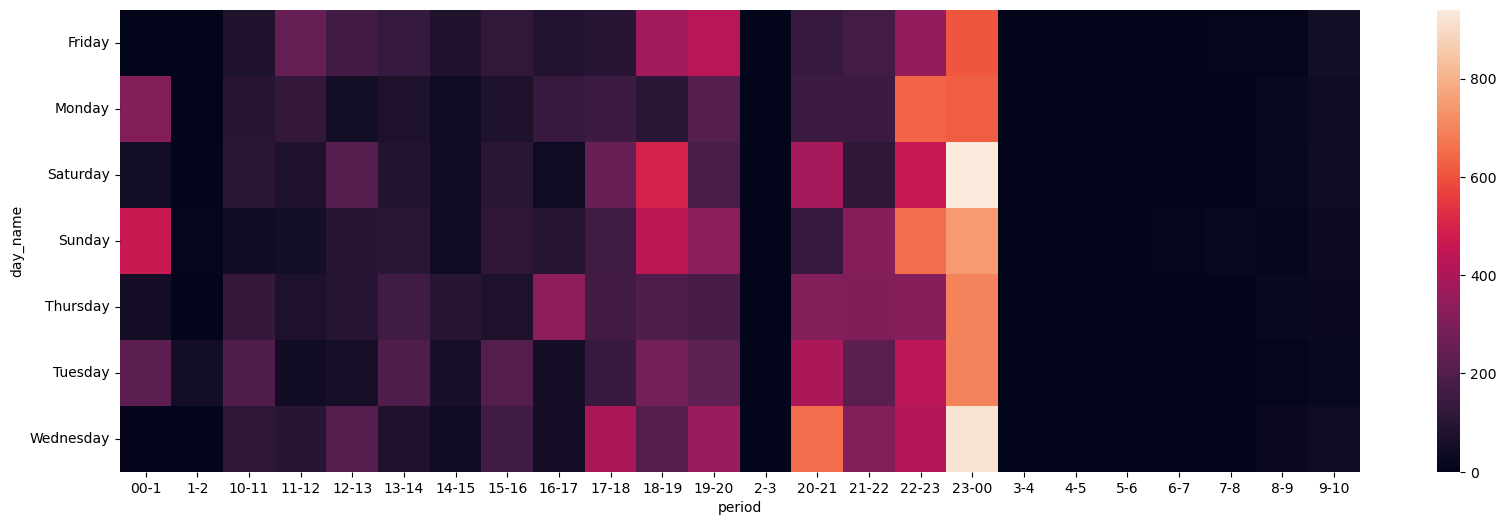

In [111]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period', values = 'message',aggfunc='count').fillna(0))
plt.yticks(rotation ='horizontal')
plt.show()

In [112]:
df.pivot_table(index='day_name',columns='period', values = 'message',aggfunc='count').fillna(0)

period      00-1   1-2  10-11  11-12  12-13  13-14  14-15  15-16  16-17  \
day_name                                                                  
Friday       3.0   0.0   76.0  248.0  165.0  134.0   74.0  123.0   88.0   
Monday     315.0   2.0  100.0  128.0   50.0   71.0   34.0   74.0  137.0   
Saturday    48.0   2.0  108.0   77.0  212.0   88.0   43.0  107.0   35.0   
Sunday     466.0  10.0   41.0   49.0   97.0  105.0   44.0  120.0   99.0   
Thursday    53.0   1.0  129.0   72.0   93.0  161.0   98.0   73.0  337.0   
Tuesday    224.0  45.0  195.0   44.0   58.0  197.0   61.0  204.0   53.0   
Wednesday    6.0   0.0  121.0  101.0  204.0   71.0   40.0  159.0   55.0   

period     17-18  ...  21-22  22-23  23-00  3-4  4-5  5-6   6-7   7-8   8-9  \
day_name          ...                                                         
Friday     102.0  ...  168.0  345.0  606.0  0.0  0.0  0.0   2.0   9.0   8.0   
Monday     150.0  ...  154.0  632.0  623.0  0.0  3.0  0.0   3.0   5.0  19.0   
Saturday   251.0  ...  114.0  458.0  940.0  1.0  0.0  0.0   1.0   3.0  19.0   
Sunday     160.0  ...  320.0  653.0  748.0  1.0  1.0  0.0  11.0  20.0   9.0   
Thursday   165.0  ...  306.0  317.0  695.0  0.0  0.0  2.0   2.0   6.0  20.0   
Tuesday    142.0  ...  223.0  436.0  695.0  0.0  0.0  0.0   2.0   6.0  10.0   
Wednesday  398.0  ...  315.0  421.0  919.0  0.0  0.0  0.0   5.0   6.0  24.0   

period     9-10  
day_name         
Friday     49.0  
Monday     38.0  
Saturday   43.0  
Sunday     30.0  
Thursday   28.0  
Tuesday    19.0  
Wednesday  34.0  

[7 rows x 24 columns]